In [805]:
import pandas as pd
import networkx as nx
import glob

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for notebook
%matplotlib inline

## Datasets

1. brasileirao_serie_a - 21 temporadas
2. brazilian-soccer-database (libetadores) - 11 temporadas
3. campeonato-paulista-de-futebol - 11 temporadas
4. copa_do_brasil - 4 temporadas
5. englishfootball - 123 temporadas
6. LaLigaCompleteDataset - 29 temporadas
7. Ligue1_saison_2020_2021 - 1 temporada
8. worldcup - 21 temporadas

In [933]:
# https://basedosdados.org/dataset/c861330e-bca2-474d-9073-bc70744a1b23?table=18835b0d-233e-4857-b454-1fa34a81b4fa

brasileirao = pd.read_csv('../data/brasileirao_a/brasileirao_serie_a.csv', sep=',')
df = brasileirao.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8079 non-null   int64  
 1   data                            8079 non-null   object 
 2   rodada                          8079 non-null   int64  
 3   estadio                         8068 non-null   object 
 4   arbitro                         6369 non-null   object 
 5   publico                         6368 non-null   float64
 6   publico_max                     3817 non-null   float64
 7   time_mandante                   8079 non-null   object 
 8   time_visitante                  8079 non-null   object 
 9   tecnico_mandante                5926 non-null   object 
 10  tecnico_visitante               5926 non-null   object 
 11  colocacao_mandante              6369 non-null   float64
 12  colocacao_visitante             63

In [934]:
df.columns

Index(['ano_campeonato', 'data', 'rodada', 'estadio', 'arbitro', 'publico',
       'publico_max', 'time_mandante', 'time_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'colocacao_mandante', 'colocacao_visitante',
       'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
       'idade_media_titular_mandante', 'idade_media_titular_visitante',
       'gols_mandante', 'gols_visitante', 'gols_1_tempo_mandante',
       'gols_1_tempo_visitante', 'escanteios_mandante', 'escanteios_visitante',
       'faltas_mandante', 'faltas_visitante', 'chutes_bola_parada_mandante',
       'chutes_bola_parada_visitante', 'defesas_mandante', 'defesas_visitante',
       'impedimentos_mandante', 'impedimentos_visitante', 'chutes_mandante',
       'chutes_visitante', 'chutes_fora_mandante', 'chutes_fora_visitante'],
      dtype='object')

In [935]:
#df = df[df['ano_campeonato'] == [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]]
#df = df.loc[df['ano_campeonato'].isin([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])].reset_index()
df = df[['ano_campeonato', 'time_mandante', 'time_visitante', 'gols_mandante', 'gols_visitante']] 
df.head()

,ano_campeonato,time_mandante,time_visitante,gols_mandante,gols_visitante
0,2017,Chapecoense,Palmeiras,1.0,0.0
1,2017,Chapecoense,Avaí FC,2.0,0.0
2,2017,Chapecoense,Grêmio,3.0,6.0
3,2017,Chapecoense,Vasco da Gama,2.0,1.0
4,2017,Chapecoense,Botafogo,0.0,2.0


In [936]:
df.rename(columns = {
    'ano_campeonato':'year', 
    'time_mandante':'home', 
    'time_visitante':'away', 
    'gols_mandante':'home_goals', 
    'gols_visitante':'away_goals'
    }, inplace = True) 


In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        8079 non-null   int64  
 1   home        8079 non-null   object 
 2   away        8079 non-null   object 
 3   home_goals  8078 non-null   float64
 4   away_goals  8078 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 315.7+ KB


In [938]:
print(sorted(df['year'].unique()))
print("#temporadas = ", len(df['year'].unique()))

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
#temporadas =  21


In [939]:
vertices = list(df['home'].unique())
print(vertices)
print("#times = ",len(vertices))

['Chapecoense', 'Palmeiras', 'EC Bahia', 'EC Vitória', 'Atlético-PR', 'Grêmio', 'Corinthians', 'Sport Recife', 'Atlético-GO', 'Vasco da Gama', 'Flamengo', 'Santos FC', 'Fluminense', 'Atlético-MG', 'Ponte Preta', 'Avaí FC', 'Coritiba FC', 'Botafogo', 'São Paulo', 'Cruzeiro', 'Paraná', 'Fortaleza', 'Goiás EC', 'Juventude', 'Paysandu SC', 'São Caetano', 'Internacional', 'Brasiliense-DF', 'Figueirense FC', 'Santa Cruz', 'América-MG', 'Náutico', 'América-RN', 'Portuguesa', 'Ipatinga FC', 'Ceará SC', 'Athletico-PR', 'RB Bragantino', 'Santo André', 'Barueri', 'CSA', 'Santos', 'Cuiabá-MT', 'Guarani', 'Criciúma EC', 'Joinville-SC', 'Goiás']
#times =  47


In [940]:
#df['weights'] = 0.0

In [941]:
#for keys, infos in df.iterrows():
#    #print(infos.away_goals)
#    infos.weights

In [942]:
#df.head()

In [943]:
#df.loc[df['home_goals'] > df['away_goals'], 'weights'] = 3.0
#df.loc[df['home_goals'] == df['away_goals'], 'weights'] = 1.0
#df.head()

In [944]:
df2 = df.groupby(
    ['home', 'away'],
    as_index=False,
    sort=False).agg({'home_goals':'sum', 'away_goals':'sum'}
                                 )

In [945]:
df2

,home,away,home_goals,away_goals
0,Chapecoense,Palmeiras,11.0,8.0
1,Chapecoense,Avaí FC,3.0,0.0
2,Chapecoense,Grêmio,10.0,16.0
3,Chapecoense,Vasco da Gama,5.0,4.0
4,Chapecoense,Botafogo,4.0,5.0
...,...,...,...,...
1585,Santos,Cruzeiro,0.0,3.0
1586,RB Bragantino,Cruzeiro,0.0,3.0
1587,Goiás,EC Bahia,4.0,6.0
1588,Figueirense FC,Ceará SC,1.0,1.0


In [946]:
df2['weights'] = df2['away_goals']

In [947]:
df2

,home,away,home_goals,away_goals,weights
0,Chapecoense,Palmeiras,11.0,8.0,8.0
1,Chapecoense,Avaí FC,3.0,0.0,0.0
2,Chapecoense,Grêmio,10.0,16.0,16.0
3,Chapecoense,Vasco da Gama,5.0,4.0,4.0
4,Chapecoense,Botafogo,4.0,5.0,5.0
...,...,...,...,...,...
1585,Santos,Cruzeiro,0.0,3.0,3.0
1586,RB Bragantino,Cruzeiro,0.0,3.0,3.0
1587,Goiás,EC Bahia,4.0,6.0,6.0
1588,Figueirense FC,Ceará SC,1.0,1.0,1.0


In [949]:
SG = nx.DiGraph()

SG = nx.from_pandas_edgelist(df2, "home", "away", ["weights"])

n = nx.number_of_nodes(SG)
m = nx.number_of_edges(SG)

print("#vertices =", n)
print("#arestas =", m)

print("rede eh conexa:", nx.is_connected(SG))

#vertices = 47
#arestas = 801
rede eh conexa: True


In [950]:
# grafico

def grafico_g(G, pos, rede):

    fig, ax = plt.subplots(1,1,figsize=(25,20))

    # draw edges
    nx.draw_networkx_edges(G, 
                           pos=pos, 
                           alpha=0.4, 
                           arrows=True,
                           ax=ax)

    # draw nodes
    nodes = nx.draw_networkx_nodes(G,
                                   node_size=200,
                                   pos=pos,
                                   node_color='lightblue',  
                                   cmap=plt.cm.jet,
                                   ax=ax)

    # draw labels
    nx.draw_networkx_labels(G, 
                            pos=pos,
                            font_weight='bold',
                            font_color='black',
                            font_size=11, 
                            ax=ax)

    plt.title(rede)
    plt.axis("off")
    plt.show()

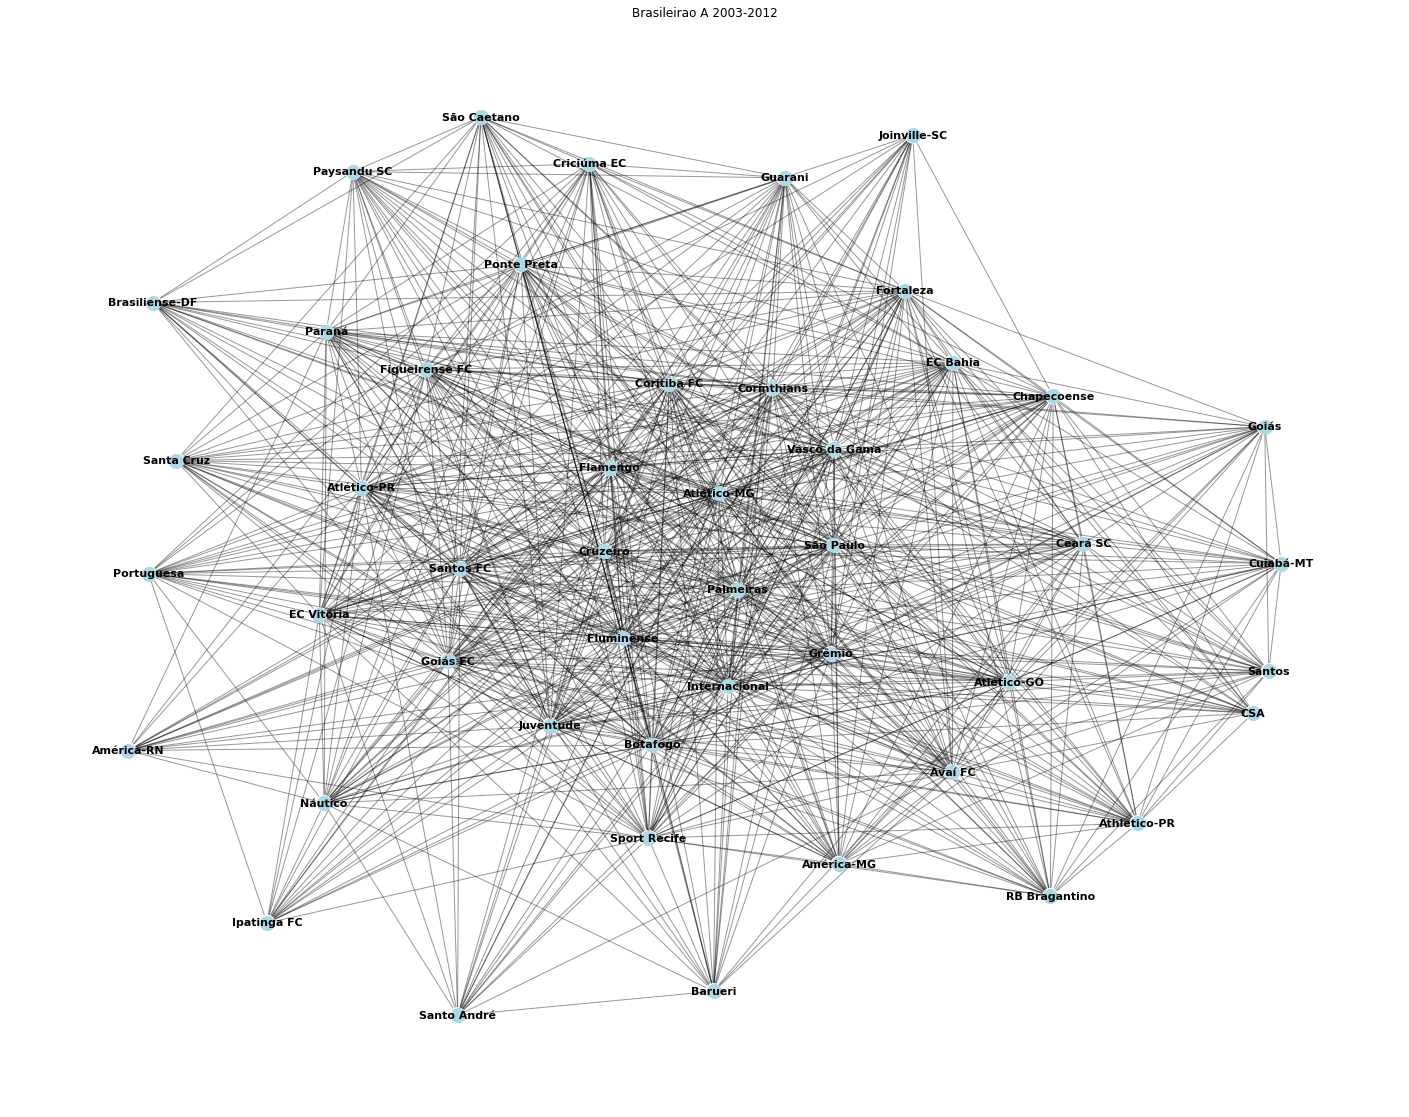

In [951]:
#pos = nx.nx_pydot.graphviz_layout(SG)
pos = nx.kamada_kawai_layout(SG)
grafico_g(SG, pos, "Brasileirao A 2003-2012")

In [952]:
list(SG.nodes())[:10]

['Chapecoense',
 'Palmeiras',
 'Avaí FC',
 'Grêmio',
 'Vasco da Gama',
 'Botafogo',
 'Atlético-MG',
 'Atlético-PR',
 'São Paulo',
 'Atlético-GO']

In [953]:
list(SG.edges.data('pesos'))[:10]

[('Chapecoense', 'Palmeiras', None),
 ('Chapecoense', 'Avaí FC', None),
 ('Chapecoense', 'Grêmio', None),
 ('Chapecoense', 'Vasco da Gama', None),
 ('Chapecoense', 'Botafogo', None),
 ('Chapecoense', 'Atlético-MG', None),
 ('Chapecoense', 'Atlético-PR', None),
 ('Chapecoense', 'São Paulo', None),
 ('Chapecoense', 'Atlético-GO', None),
 ('Chapecoense', 'EC Bahia', None)]

In [954]:
df2.loc[df2['home'].str.contains('Avaí')]

,home,away,home_goals,away_goals,weights
217,Avaí FC,EC Vitória,4.0,0.0,0.0
218,Avaí FC,Sport Recife,5.0,4.0,4.0
219,Avaí FC,Flamengo,12.0,11.0,11.0
220,Avaí FC,Fluminense,5.0,13.0,13.0
221,Avaí FC,Ponte Preta,1.0,0.0,0.0
222,Avaí FC,Coritiba FC,5.0,9.0,9.0
223,Avaí FC,Corinthians,12.0,9.0,9.0
224,Avaí FC,Cruzeiro,7.0,7.0,7.0
225,Avaí FC,Santos FC,8.0,9.0,9.0
226,Avaí FC,São Paulo,5.0,5.0,5.0


In [955]:
df2.loc[df2['away'].str.contains('Avaí')]

,home,away,home_goals,away_goals,weights
1,Chapecoense,Avaí FC,3.0,0.0,0.0
25,Palmeiras,Avaí FC,21.0,3.0,3.0
63,Atlético-PR,Avaí FC,9.0,4.0,4.0
79,Grêmio,Avaí FC,17.0,7.0,7.0
108,Corinthians,Avaí FC,14.0,2.0,2.0
124,Vasco da Gama,Avaí FC,6.0,2.0,2.0
143,Flamengo,Avaí FC,16.0,5.0,5.0
156,EC Vitória,Avaí FC,3.0,2.0,2.0
177,Santos FC,Avaí FC,16.0,8.0,8.0
182,Atlético-MG,Avaí FC,13.0,4.0,4.0


In [956]:
df.to_csv('brasileira_a_2003_2012.csv', index=False)  

In [957]:
# https://www.kaggle.com/datasets/ricardomattos05/brazilian-soccer-database

libertadores = pd.read_csv('../data/BrazilianSoccer/Data/Libertadores_Matches.csv', sep=',')
df = libertadores.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1254 non-null   object 
 1   home_team  1255 non-null   object 
 2   away_team  1255 non-null   object 
 3   home_goal  1255 non-null   object 
 4   away_goal  1255 non-null   object 
 5   season     1254 non-null   float64
 6   stage      1255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.8+ KB


In [958]:
df.head()

,datetime,home_team,away_team,home_goal,away_goal,season,stage
0,2013-02-12 20:15:00,Nacional (URU),Barcelona-EQU,2,2,2013.0,group stage
1,2013-02-13 22:00:00,Boca Juniors,Toluca,1,2,2013.0,group stage
2,2013-02-19 23:45:00,Toluca,Nacional (URU),2,3,2013.0,group stage
3,2013-02-27 19:45:00,Barcelona-EQU,Boca Juniors,1,2,2013.0,group stage
4,2013-03-07 00:15:00,Toluca,Barcelona-EQU,1,1,2013.0,group stage


In [959]:
df.tail()

,datetime,home_team,away_team,home_goal,away_goal,season,stage
1250,2022-08-30 21:30:00,Athletico,Palmeiras,1,0,2022.0,semifinals
1251,2022-09-06 21:30:00,Palmeiras,Athletico,2,2,2022.0,semifinals
1252,2022-08-31 21:30:00,Vélez Sarsfield,Flamengo,0,4,2022.0,semifinals
1253,2022-09-07 21:30:00,Flamengo,Vélez Sarsfield,2,1,2022.0,semifinals
1254,NaN,Flamengo,Athletico,-,-,NaN,final


In [960]:
#df = df[df['season'] == 2017]
#df = df.loc[df['season'].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])].reset_index()
df = df[['season', 'home_team', 'away_team', 'home_goal', 'away_goal']] 

In [961]:
df.rename(columns = {
    'season':'year', 
    'home_team':'home', 
    'away_team':'away', 
    'home_goal':'home_goals', 
    'away_goal':'away_goals'
    }, inplace = True)

In [962]:
df['home_goals'] = pd.to_numeric(df['home_goals'], errors='coerce')
df['away_goals'] = pd.to_numeric(df['away_goals'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
#df['stage'] = pd.to_numeric(df['stage'], errors='coerce')

In [963]:
print(sorted(df['year'].unique()))
print("#temporadas = ", len(df['year'].unique()))

[2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, nan]
#temporadas =  11


In [964]:
df2 = df.groupby(['home', 'away'], 
                 as_index=False, 
                 sort=False).agg({'home_goals':'sum', 'away_goals':'sum'})

In [965]:
df2

,home,away,home_goals,away_goals
0,Nacional (URU),Barcelona-EQU,2.0,2.0
1,Boca Juniors,Toluca,1.0,2.0
2,Toluca,Nacional (URU),2.0,3.0
3,Barcelona-EQU,Boca Juniors,2.0,2.0
4,Toluca,Barcelona-EQU,1.0,1.0
...,...,...,...,...
1121,Vélez Sarsfield,Talleres,3.0,2.0
1122,Talleres,Vélez Sarsfield,0.0,1.0
1123,Athletico,Palmeiras,1.0,0.0
1124,Palmeiras,Athletico,2.0,2.0


In [966]:
df2['weights'] = df2['away_goals']

In [967]:
df2

,home,away,home_goals,away_goals,weights
0,Nacional (URU),Barcelona-EQU,2.0,2.0,2.0
1,Boca Juniors,Toluca,1.0,2.0,2.0
2,Toluca,Nacional (URU),2.0,3.0,3.0
3,Barcelona-EQU,Boca Juniors,2.0,2.0,2.0
4,Toluca,Barcelona-EQU,1.0,1.0,1.0
...,...,...,...,...,...
1121,Vélez Sarsfield,Talleres,3.0,2.0,2.0
1122,Talleres,Vélez Sarsfield,0.0,1.0,1.0
1123,Athletico,Palmeiras,1.0,0.0,0.0
1124,Palmeiras,Athletico,2.0,2.0,2.0


In [968]:
SG = nx.DiGraph()

SG = nx.from_pandas_edgelist(df2, "home", "away", ["weights"])

n = nx.number_of_nodes(SG)
m = nx.number_of_edges(SG)

print("#vertices =", n)
print("#arestas =", m)

print("rede eh conexa:", nx.is_connected(SG))

#vertices = 114
#arestas = 564
rede eh conexa: True


In [969]:
# https://www.kaggle.com/datasets/profdavidsonsantana/campeonato-paulista-de-futebol-placares-e-odds

#paulista2013 = pd.read_csv('../data/campeonato_paulista/paulista-2013.csv', sep=';')
#paulista2014 = pd.read_csv('../data/campeonato_paulista/paulista-2014.csv', sep=';')
#paulista2015 = pd.read_csv('../data/campeonato_paulista/paulista-2015.csv', sep=';')
#paulista2016 = pd.read_csv('../data/campeonato_paulista/paulista-2016.csv', sep=';')
#paulista2017 = pd.read_csv('../data/campeonato_paulista/paulista-2017.csv', sep=';')
#paulista2018 = pd.read_csv('../data/campeonato_paulista/paulista-2018.csv', sep=';')
#paulista2019 = pd.read_csv('../data/campeonato_paulista/paulista-2019.csv', sep=';')
#paulista2020 = pd.read_csv('../data/campeonato_paulista/paulista-2020.csv', sep=';')
#paulista2021 = pd.read_csv('../data/campeonato_paulista/paulista-2021.csv', sep=';')
#paulista2022 = pd.read_csv('../data/campeonato_paulista/paulista-2022.csv', sep=';')
#paulista2023 = pd.read_csv('../data/campeonato_paulista/paulista-2023.csv', sep=';')

#df = paulista2015.copy()
#df.info() 

In [970]:
# Get CSV files list from a folder
path = '../data/campeonato_paulista'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file, sep=';') for file in csv_files)

# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

In [971]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nacao       1476 non-null   object 
 1   campeonato  1476 non-null   object 
 2   rodada      1476 non-null   object 
 3   ano         1476 non-null   int64  
 4   dia         1476 non-null   object 
 5   home        1476 non-null   object 
 6   away        1476 non-null   object 
 7   HGHT        1476 non-null   int64  
 8   AGHT        1476 non-null   int64  
 9   HGFT        1476 non-null   int64  
 10  AGFT        1476 non-null   int64  
 11  odd_home    1476 non-null   float64
 12  odd_draw    1476 non-null   float64
 13  odd_away    1476 non-null   float64
 14  over25      1476 non-null   float64
 15  endereco    1476 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory usage: 184.6+ KB


In [972]:
df.head()

,nacao,campeonato,rodada,ano,dia,home,away,HGHT,AGHT,HGFT,AGFT,odd_home,odd_draw,odd_away,over25,endereco
0,BRAZIL,PAULISTA,ROUND 1,2017,03.02.2017,Santos,Linense,2,0,6,2,1.24,5.84,11.88,1.62,https://www.flashscore.com/match/rqjTwac0/#/ma...
1,BRAZIL,PAULISTA,ROUND 1,2017,04.02.2017,Santo Andre,Ituano,0,0,1,1,2.50,3.05,2.72,2.39,https://www.flashscore.com/match/0zknfKss/#/ma...
2,BRAZIL,PAULISTA,ROUND 1,2017,04.02.2017,Sao Bento,Corinthians,0,0,0,1,4.76,3.43,1.73,2.34,https://www.flashscore.com/match/fgCJb0ZP/#/ma...
3,BRAZIL,PAULISTA,ROUND 1,2017,04.02.2017,Novorizontino,Sao Bernardo,2,1,3,2,2.03,3.29,3.52,2.16,https://www.flashscore.com/match/vRmjgvcm/#/ma...
4,BRAZIL,PAULISTA,ROUND 1,2017,05.02.2017,Mirassol,RB Brasil,1,0,2,0,2.48,3.18,2.77,1.99,https://www.flashscore.com/match/SnKXzcsJ/#/ma...


In [973]:
df.rename(columns = {
    'ano':'year', 
    'home':'home', 
    'away':'away', 
    'HGFT':'home_goals', 
    'AGFT':'away_goals'
    }, inplace = True) 


In [974]:
df = df[['year','home','away','home_goals','away_goals']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        1476 non-null   int64 
 1   home        1476 non-null   object
 2   away        1476 non-null   object
 3   home_goals  1476 non-null   int64 
 4   away_goals  1476 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 57.8+ KB


In [975]:
print(sorted(df['year'].unique()))
print("#temporadas = ", len(df['year'].unique()))

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
#temporadas =  11


In [976]:
vertices = list(df['home'].unique())
print(vertices)
print(len(vertices))

['Santos', 'Santo Andre', 'Sao Bento', 'Novorizontino', 'Mirassol', 'Palmeiras', 'Audax-SP', 'Ponte Preta', 'RB Brasil', 'Linense', 'Ferroviaria', 'Botafogo SP', 'Corinthians', 'Sao Paulo', 'Sao Bernardo', 'Ituano', 'Rio Claro', 'Bragantino', 'Capivariano', 'Piracicaba', 'Penapolense', 'Portuguesa', 'Marilia', 'Mogi Mirim', 'Paulista', 'Oeste', 'Atl. Sorocaba', 'Comercial', 'Agua Santa', 'Guarani', 'Inter de Limeira', 'Sao Caetano', 'Uniao Barbarense']
33


In [977]:
df2 = df.groupby(
    ['home', 'away'], 
    as_index=False, 
    sort=False).agg({'home_goals':'sum', 'away_goals':'sum'})

In [979]:
df2['weights'] = df2['away_goals']
df2

,home,away,home_goals,away_goals,weights
0,Santos,Linense,10,4,4
1,Santo Andre,Ituano,3,5,5
2,Sao Bento,Corinthians,2,3,3
3,Novorizontino,Sao Bernardo,3,2,2
4,Mirassol,RB Brasil,9,3,3
...,...,...,...,...,...
679,Oeste,RB Brasil,1,2,2
680,Ferroviaria,Sao Caetano,2,0,0
681,Guarani,RB Brasil,1,2,2
682,Guarani,Mirassol,2,2,2


In [988]:
SG = nx.DiGraph()

SG = nx.from_pandas_edgelist(df2, "home", "away", ["weights"])

n = nx.number_of_nodes(SG)
m = nx.number_of_edges(SG)

print("#vertices =", n)
print("#arestas =", m)

print("rede eh conexa:", nx.is_connected(SG))

#vertices = 170
#arestas = 323
rede eh conexa: True


In [989]:
# https://basedosdados.org/dataset/c861330e-bca2-474d-9073-bc70744a1b23?table=19e96c3f-c932-4e14-82e2-58e170454e3d 

copa_brasil = pd.read_csv('../data/copa_brasil/copa_brasil.csv', sep=',')
df = copa_brasil.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  424 non-null    int64  
 1   data                            424 non-null    object 
 2   horario                         424 non-null    object 
 3   fase                            424 non-null    object 
 4   tipo_fase                       424 non-null    object 
 5   estadio                         423 non-null    object 
 6   arbitro                         110 non-null    object 
 7   publico                         424 non-null    int64  
 8   publico_max                     396 non-null    float64
 9   time_mandante                   424 non-null    object 
 10  time_visitante                  424 non-null    object 
 11  tecnico_mandante                262 non-null    object 
 12  tecnico_visitante               262 

In [990]:
df.columns

Index(['ano_campeonato', 'data', 'horario', 'fase', 'tipo_fase', 'estadio',
       'arbitro', 'publico', 'publico_max', 'time_mandante', 'time_visitante',
       'tecnico_mandante', 'tecnico_visitante',
       'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
       'idade_media_titular_mandante', 'idade_media_titular_visitante',
       'gols_mandante', 'gols_visitante', 'gols_1_tempo_mandante',
       'gols_1_tempo_visitante', 'penalti', 'gols_penalti_mandante',
       'gols_penalti_visitante', 'escanteios_mandante', 'escanteios_visitante',
       'faltas_mandante', 'faltas_visitante', 'chutes_bola_parada_mandante',
       'chutes_bola_parada_visitante', 'defesas_mandante', 'defesas_visitante',
       'impedimentos_mandante', 'impedimentos_visitante', 'chutes_mandante',
       'chutes_visitante', 'chutes_fora_mandante', 'chutes_fora_visitante'],
      dtype='object')

In [991]:
df.rename(columns = {
    'ano_campeonato':'year', 
    'time_mandante':'home', 
    'time_visitante':'away', 
    'gols_mandante':'home_goals', 
    'gols_visitante':'away_goals'
    }, inplace = True) 


In [992]:
print(sorted(df['year'].unique()))
print("#temporadas = ", len(df['year'].unique()))

[2020, 2021, 2022, 2023]
#temporadas =  4


In [993]:
#df = df[df['ano_campeonato'] == 2017]
df = df[['year', 'home', 'away', 'home_goals', 'away_goals']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        424 non-null    int64 
 1   home        424 non-null    object
 2   away        424 non-null    object
 3   home_goals  424 non-null    int64 
 4   away_goals  424 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 16.7+ KB


In [994]:
df2 = df.groupby(
    ['home', 'away'], 
    as_index=False, 
    sort=False).agg({'home_goals':'sum', 'away_goals':'sum'})

In [995]:
df2

,home,away,home_goals,away_goals
0,Grêmio,São Paulo,1,0
1,Atlético-GO,Internacional,1,2
2,Grêmio,Juventude,1,0
3,Vasco da Gama,Botafogo,0,0
4,Afogados,Ponte Preta,0,2
...,...,...,...,...
404,Globo,Brasiliense,1,1
405,Coritiba FC,Criciúma EC,1,1
406,Águia de Marabá,Goiás,0,0
407,Ituano,Ceará SC,1,1


In [996]:
df2['weights'] = df2['away_goals']
df2

,home,away,home_goals,away_goals,weights
0,Grêmio,São Paulo,1,0,0
1,Atlético-GO,Internacional,1,2,2
2,Grêmio,Juventude,1,0,0
3,Vasco da Gama,Botafogo,0,0,0
4,Afogados,Ponte Preta,0,2,2
...,...,...,...,...,...
404,Globo,Brasiliense,1,1,1
405,Coritiba FC,Criciúma EC,1,1,1
406,Águia de Marabá,Goiás,0,0,0
407,Ituano,Ceará SC,1,1,1


In [997]:
SG = nx.DiGraph()

SG = nx.from_pandas_edgelist(df2, "home", "away", ["weights"])

n = nx.number_of_nodes(SG)
m = nx.number_of_edges(SG)

print("#vertices =", n)
print("#arestas =", m)

print("rede eh conexa:", nx.is_connected(SG))

#vertices = 170
#arestas = 323
rede eh conexa: True


In [998]:
# https://github.com/jfjelstul/englishfootball

englishfootball = pd.read_csv('../data/englishfootball/data-csv/matches.csv', sep=',')
df = englishfootball.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203956 entries, 0 to 203955
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   key_id                  203956 non-null  int64 
 1   season_id               203956 non-null  object
 2   season                  203956 non-null  int64 
 3   tier                    203956 non-null  int64 
 4   division                203956 non-null  object
 5   subdivision             203956 non-null  object
 6   match_id                203956 non-null  object
 7   match_name              203956 non-null  object
 8   home_team_id            203956 non-null  object
 9   home_team_name          203956 non-null  object
 10  away_team_id            203956 non-null  object
 11  away_team_name          203956 non-null  object
 12  score                   203956 non-null  object
 13  home_team_score         203956 non-null  int64 
 14  away_team_score         203956 non-n

In [999]:
#df = df[df['season'] == 2017]
df = df[[
    'season', 
    'home_team_name', 
    'away_team_name', 
    'home_team_score', 
    'away_team_score']
    ] 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203956 entries, 0 to 203955
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   season           203956 non-null  int64 
 1   home_team_name   203956 non-null  object
 2   away_team_name   203956 non-null  object
 3   home_team_score  203956 non-null  int64 
 4   away_team_score  203956 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.8+ MB


In [1000]:
df.rename(columns = {
    'season':'year', 
    'home_team_name':'home', 
    'away_team_name':'away', 
    'home_team_score':'home_goals', 
    'away_team_score':'away_goals'
    }, inplace = True) 


In [1001]:
print(sorted(df['year'].unique()))
print("#temporadas", len(df['year'].unique()))

[1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
#temporadas 123


In [1002]:
vertices = list(df['home'].unique())
print(vertices)
print(len(vertices))

['Accrington', 'Aston Villa', 'Blackburn Rovers', 'Bolton Wanderers', 'Burnley', 'Derby County', 'Everton', 'Notts County', 'Preston North End', 'Stoke', 'West Bromwich Albion', 'Wolverhampton Wanderers', 'Sunderland', 'Darwen', 'Newton Heath', 'Nottingham Forest', 'The Wednesday', 'Ardwick', 'Bootle', 'Burslem Port Vale', 'Burton Swifts', 'Crewe Alexandra', 'Grimsby Town', 'Lincoln City', 'Northwich Victoria', 'Sheffield United', 'Small Heath', 'Walsall Town Swifts', 'Liverpool', 'Middlesbrough Ironopolis', 'Newcastle United', 'Rotherham Town', 'Walsall', 'Woolwich Arsenal', 'Burton Wanderers', 'Bury', 'Leicester Fosse', 'Manchester City', 'Loughborough', 'Blackpool', 'Gainsborough Trinity', 'Luton Town', 'Barnsley', 'Glossop North End', 'New Brighton Tower', 'Glossop', 'Chesterfield Town', 'Middlesbrough', 'Stockport County', 'Bristol City', 'Burton United', 'Doncaster Rovers', 'Manchester United', 'Bradford City', 'Birmingham', 'Chelsea', 'Clapton Orient', 'Hull City', 'Leeds City',

In [1003]:
df2 = df.groupby(
    ['home', 'away'], 
    as_index=False, 
    sort=False).agg({'home_goals':'sum', 'away_goals':'sum'})

df2

,home,away,home_goals,away_goals
0,Accrington,Aston Villa,10,9
1,Accrington,Blackburn Rovers,4,9
2,Accrington,Bolton Wanderers,8,9
3,Accrington,Burnley,9,8
4,Accrington,Derby County,17,7
...,...,...,...,...
14212,Swindon Town,Harrogate Town,1,1
14213,Swindon Town,Salford City,1,2
14214,Swindon Town,Sutton United,2,1
14215,Tranmere Rovers,Sutton United,0,1


In [1004]:
df2['weights'] = df2['away_goals']
df2

,home,away,home_goals,away_goals,weights
0,Accrington,Aston Villa,10,9,9
1,Accrington,Blackburn Rovers,4,9,9
2,Accrington,Bolton Wanderers,8,9,9
3,Accrington,Burnley,9,8,8
4,Accrington,Derby County,17,7,7
...,...,...,...,...,...
14212,Swindon Town,Harrogate Town,1,1,1
14213,Swindon Town,Salford City,1,2,2
14214,Swindon Town,Sutton United,2,1,1
14215,Tranmere Rovers,Sutton United,0,1,1


In [1005]:
SG = nx.DiGraph()

SG = nx.from_pandas_edgelist(df2, "home", "away", ["weights"])

n = nx.number_of_nodes(SG)
m = nx.number_of_edges(SG)

print("#vertices =", n)
print("#arestas =", m)

print("rede eh conexa:", nx.is_connected(SG))

#vertices = 165
#arestas = 7110
rede eh conexa: True


In [1006]:
# https://www.kaggle.com/datasets/kishan305/la-liga-results-19952020?rvi=1

la_liga = pd.read_csv('../data/LaLigaCompleteDataset/LaLiga_Matches.csv', sep=',')
df = la_liga.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10883 non-null  object 
 1   Date      10883 non-null  object 
 2   HomeTeam  10883 non-null  object 
 3   AwayTeam  10883 non-null  object 
 4   FTHG      10883 non-null  int64  
 5   FTAG      10883 non-null  int64  
 6   FTR       10883 non-null  object 
 7   HTHG      10881 non-null  float64
 8   HTAG      10881 non-null  float64
 9   HTR       10881 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 850.4+ KB


In [1007]:
df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D


In [1008]:
df.tail()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
10878,2023-24,01-10-2023,Almeria,Granada,3,3,D,3.0,0.0,H
10879,2023-24,01-10-2023,Alaves,Osasuna,0,2,A,0.0,1.0,A
10880,2023-24,01-10-2023,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A
10881,2023-24,01-10-2023,Betis,Valencia,3,0,H,1.0,0.0,H
10882,2023-24,02-10-2023,Las Palmas,Celta,2,1,H,0.0,0.0,D


In [1009]:
print(sorted(df['Season'].unique()))
print("#temporadas = ", len(df['Season'].unique()))

['1995-96', '1996-97', '1997-98', '1998-99', '1999-2000', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']
#temporadas =  29


In [1010]:
#df = df[df['Season'] == 1995-96]
df = df[['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']] 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    10883 non-null  object
 1   HomeTeam  10883 non-null  object
 2   AwayTeam  10883 non-null  object
 3   FTHG      10883 non-null  int64 
 4   FTAG      10883 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 425.2+ KB


In [1011]:
df.rename(columns = {
    'Season':'year', 
    'HomeTeam':'home', 
    'AwayTeam':'away', 
    'FTHG':'home_goals', 
    'FTAG':'away_goals'
    }, inplace = True) 


In [1012]:
df2 = df.groupby(
    ['home', 'away'], 
    as_index=False, 
    sort=False).agg({'home_goals':'sum', 'away_goals':'sum'})

df2

,home,away,home_goals,away_goals
0,La Coruna,Valencia,27,27
1,Sp Gijon,Albacete,3,0
2,Ath Bilbao,Santander,32,17
3,Ath Madrid,Sociedad,46,18
4,Celta,Compostela,4,6
...,...,...,...,...
1646,Almeria,Cadiz,1,1
1647,Girona,Elche,2,0
1648,Girona,Mallorca,7,4
1649,Osasuna,Girona,2,1


In [1013]:
df2['weights'] = df2['away_goals']
df2

,home,away,home_goals,away_goals,weights
0,La Coruna,Valencia,27,27,27
1,Sp Gijon,Albacete,3,0,0
2,Ath Bilbao,Santander,32,17,17
3,Ath Madrid,Sociedad,46,18,18
4,Celta,Compostela,4,6,6
...,...,...,...,...,...
1646,Almeria,Cadiz,1,1,1
1647,Girona,Elche,2,0,0
1648,Girona,Mallorca,7,4,4
1649,Osasuna,Girona,2,1,1


In [1026]:
SG = nx.DiGraph()
print(SG)

SG = nx.from_pandas_edgelist(df2, "home", "away", ["weights"])

n = nx.number_of_nodes(SG)
m = nx.number_of_edges(SG)

print("#vertices =", n)
print("#arestas =", m)

print("rede eh conexa:", nx.is_connected(SG))

DiGraph with 0 nodes and 0 edges
#vertices = 48
#arestas = 826
rede eh conexa: True


In [1015]:
# https://www.kaggle.com/datasets/lucmouneyres/ligue-1-saison-20202021?rvi=1

ligue1 = pd.read_csv('../data/Ligue1_saison_2020_2021/data_2020_2021.csv', sep=',')
df = ligue1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   journee       380 non-null    object
 1   home          380 non-null    object
 2   away          380 non-null    object
 3   scores        380 non-null    object
 4   home_goal     380 non-null    int64 
 5   away_goal     380 non-null    int64 
 6   ht_home_goal  380 non-null    int64 
 7   ht_away_goal  380 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 23.9+ KB


In [598]:
ligue1.head()

,journee,home,away,scores,home_goal,away_goal,ht_home_goal,ht_away_goal
0,1. Journée,Girondins Bordeaux,FC Nantes,0:0 (0:0),0,0,0,0
1,1. Journée,Dijon FCO,Angers SCO,0:1 (0:1),0,1,0,1
2,1. Journée,Lille OSC,Stade Rennes,1:1 (1:0),1,1,1,0
3,1. Journée,AS Monaco,Stade Reims,2:2 (1:2),2,2,1,2
4,1. Journée,FC Lorient,RC Strasbourg,3:1 (0:1),3,1,0,1


In [599]:
print(sorted(df['journee'].unique()))
print("#temporadas = ", len(df['journee'].unique()))

['1. Journée', '10. Journée', '11. Journée', '12. Journée', '13. Journée', '14. Journée', '15. Journée', '16. Journée', '17. Journée', '18. Journée', '19. Journée', '2. Journée', '20. Journée', '21. Journée', '22. Journée', '23. Journée', '24. Journée', '25. Journée', '26. Journée', '27. Journée', '28. Journée', '29. Journée', '3. Journée', '30. Journée', '31. Journée', '32. Journée', '33. Journée', '34. Journée', '35. Journée', '36. Journée', '37. Journée', '38. Journée', '4. Journée', '5. Journée', '6. Journée', '7. Journée', '8. Journée', '9. Journée']
#temporadas =  38


In [600]:
#df = df[df['journee'] == ]
df = df[['journee', 'home', 'away', 'home_goal', 'away_goal']] 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   journee    380 non-null    object
 1   home       380 non-null    object
 2   away       380 non-null    object
 3   home_goal  380 non-null    int64 
 4   away_goal  380 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.0+ KB


In [903]:
df.rename(columns = {
    'journee':'year', 
    'home':'home', 
    'away':'away', 
    'home_goal':'home_goals', 
    'away_goal':'away_goals'
    }, inplace = True) 


In [904]:
vertices = list(df['home'].unique())
print(vertices)
print(len(vertices))

['Accrington', 'Aston Villa', 'Blackburn Rovers', 'Bolton Wanderers', 'Burnley', 'Derby County', 'Everton', 'Notts County', 'Preston North End', 'Stoke', 'West Bromwich Albion', 'Wolverhampton Wanderers', 'Sunderland', 'Darwen', 'Newton Heath', 'Nottingham Forest', 'The Wednesday', 'Ardwick', 'Bootle', 'Burslem Port Vale', 'Burton Swifts', 'Crewe Alexandra', 'Grimsby Town', 'Lincoln City', 'Northwich Victoria', 'Sheffield United', 'Small Heath', 'Walsall Town Swifts', 'Liverpool', 'Middlesbrough Ironopolis', 'Newcastle United', 'Rotherham Town', 'Walsall', 'Woolwich Arsenal', 'Burton Wanderers', 'Bury', 'Leicester Fosse', 'Manchester City', 'Loughborough', 'Blackpool', 'Gainsborough Trinity', 'Luton Town', 'Barnsley', 'Glossop North End', 'New Brighton Tower', 'Glossop', 'Chesterfield Town', 'Middlesbrough', 'Stockport County', 'Bristol City', 'Burton United', 'Doncaster Rovers', 'Manchester United', 'Bradford City', 'Birmingham', 'Chelsea', 'Clapton Orient', 'Hull City', 'Leeds City',

In [905]:
df2 = df.groupby(
    ['home', 'away'], 
    as_index=False, sort=False).agg({'home_goals':'sum', 'away_goals':'sum'})
df2

,home,away,home_goals,away_goals
0,Accrington,Aston Villa,10,9
1,Accrington,Blackburn Rovers,4,9
2,Accrington,Bolton Wanderers,8,9
3,Accrington,Burnley,9,8
4,Accrington,Derby County,17,7
...,...,...,...,...
14212,Swindon Town,Harrogate Town,1,1
14213,Swindon Town,Salford City,1,2
14214,Swindon Town,Sutton United,2,1
14215,Tranmere Rovers,Sutton United,0,1


In [906]:
df2['weights'] = df2['away_goals']
df2

,home,away,home_goals,away_goals,weights
0,Accrington,Aston Villa,10,9,9
1,Accrington,Blackburn Rovers,4,9,9
2,Accrington,Bolton Wanderers,8,9,9
3,Accrington,Burnley,9,8,8
4,Accrington,Derby County,17,7,7
...,...,...,...,...,...
14212,Swindon Town,Harrogate Town,1,1,1
14213,Swindon Town,Salford City,1,2,2
14214,Swindon Town,Sutton United,2,1,1
14215,Tranmere Rovers,Sutton United,0,1,1


In [909]:
# https://www.kaggle.com/datasets/mozattt/worldcupdata19302018

worldcup = pd.read_csv('../data/worldcup/WorldCupMatches.csv', sep=',')
df = worldcup.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [910]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [911]:
print(sorted(df['Year'].unique()))
print("#temporadas = ", len(df['Year'].unique()))

[1930.0, 1934.0, 1938.0, 1950.0, 1954.0, 1958.0, 1962.0, 1966.0, 1970.0, 1974.0, 1978.0, 1982.0, 1986.0, 1990.0, 1994.0, 1998.0, 2002.0, 2006.0, 2010.0, 2014.0, nan]
#temporadas =  21


In [912]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [613]:
#df = df[df['Year'] == ]
df = df[['Year', 
'Home Team Name',
'Home Team Goals', 
'Away Team Goals', 
'Away Team Name',
]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             852 non-null    float64
 1   Home Team Name   852 non-null    object 
 2   Home Team Goals  852 non-null    float64
 3   Away Team Goals  852 non-null    float64
 4   Away Team Name   852 non-null    object 
dtypes: float64(3), object(2)
memory usage: 178.7+ KB


In [913]:
df.rename(columns = {
    'Year':'year', 
    'Home Team Name':'home', 
    'Away Team Name':'away', 
    'Home Team Goals':'home_goals', 
    'Away Team Goals':'away_goals'
    }, inplace = True) 


In [914]:
vertices = list(df['home'].unique())
print(vertices)
print(len(vertices))

['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile', 'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary', 'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy', 'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey', 'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates', 'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia', 'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece', 'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR', 'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo', 'Iran', "C�te d'Ivoire", 'Ghana', 'Ukraine', 'Serbia', 'New Zealand', 'Slovakia', 'IR Iran', 'rn">Bosnia and Herzegovina', nan]
79


In [915]:
df2 = df.groupby(
    ['home', 'away'], 
    as_index=False, sort=False).agg({'home_goals':'sum', 'away_goals':'sum'})
df2

,home,away,home_goals,away_goals
0,France,Mexico,8.0,6.0
1,USA,Belgium,3.0,0.0
2,Yugoslavia,Brazil,2.0,1.0
3,Romania,Peru,3.0,1.0
4,Argentina,France,3.0,1.0
...,...,...,...,...
656,France,Germany,0.0,2.0
657,Brazil,Germany,2.0,14.0
658,Netherlands,Costa Rica,0.0,0.0
659,Costa Rica,Greece,2.0,2.0


In [916]:
df2['weights'] = df2['away_goals']
df2

,home,away,home_goals,away_goals,weights
0,France,Mexico,8.0,6.0,6.0
1,USA,Belgium,3.0,0.0,0.0
2,Yugoslavia,Brazil,2.0,1.0,1.0
3,Romania,Peru,3.0,1.0,1.0
4,Argentina,France,3.0,1.0,1.0
...,...,...,...,...,...
656,France,Germany,0.0,2.0,2.0
657,Brazil,Germany,2.0,14.0,14.0
658,Netherlands,Costa Rica,0.0,0.0,0.0
659,Costa Rica,Greece,2.0,2.0,2.0
